## Project Description

In this project, I was able to download, store, extract, clean, analyze, and transform an Amazon review dataset from Kaggle. Then, I selected the necessary columns that might be useful for the prediction of the star rating of each review.

Some techniques I used include text encoding, transforming date data into categorical data, encoding categorical data into numeric data, grid search, and cross-validation for the optimized model. 

Then, I evaluated the model performance with numeric metrics including F1 score, precision, and recall, and visual metrics such as a confusion matrix and a ROC curve.


## Import & Install Packages

In [0]:
!pip install textblob

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6511c613-04fa-4cfe-bef8-077592e608b7/bin/python -m pip install --upgrade pip' command.


In [0]:
pip install wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install --upgrade Pillow

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# for data analysis
import pandas as pd

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# for spark
from pyspark.sql import SparkSession

## Connect to S3

In [0]:
access_key = '...'
secret_key = '...'
encoded_secret_key = secret_key.replace("/", "%2F")
aws_bucket_name = "amazon-review-hj"
mount_name = "s3dataread"

## Read Data from S3

In [0]:
# Create a Spark session
spark = SparkSession.builder.appName("ReadS3Files").getOrCreate()

# Specify the S3 folder path
s3_folder_path = "dbfs:/mnt/s3dataread/landing/"

# List all files in the S3 folder
files = dbutils.fs.ls(s3_folder_path)

# Store file names and locations
file_name = []
file_path = []
for file in files:
    file_name.append(file.name)
    file_path.append(file.path)

In [0]:
file_name

Out[4]: ['amazon_reviews_us_Apparel_v1_00.tsv',
 'amazon_reviews_us_Automotive_v1_00.tsv',
 'amazon_reviews_us_Books_v1_02.tsv',
 'amazon_reviews_us_Camera_v1_00.tsv',
 'amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv',
 'amazon_reviews_us_Electronics_v1_00.tsv',
 'mini_df.csv/',
 'mini_df.tsv/']

In [0]:
file_path

Out[5]: ['dbfs:/mnt/s3dataread/landing/amazon_reviews_us_Apparel_v1_00.tsv',
 'dbfs:/mnt/s3dataread/landing/amazon_reviews_us_Automotive_v1_00.tsv',
 'dbfs:/mnt/s3dataread/landing/amazon_reviews_us_Books_v1_02.tsv',
 'dbfs:/mnt/s3dataread/landing/amazon_reviews_us_Camera_v1_00.tsv',
 'dbfs:/mnt/s3dataread/landing/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv',
 'dbfs:/mnt/s3dataread/landing/amazon_reviews_us_Electronics_v1_00.tsv',
 'dbfs:/mnt/s3dataread/landing/mini_df.csv/',
 'dbfs:/mnt/s3dataread/landing/mini_df.tsv/']

In [0]:
from pyspark.sql import SparkSession
from functools import reduce

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Read the first file
df = spark.read.csv(file_path[0], sep='\t', inferSchema=True, header=True)

# Vertically merge all other files
for path in file_path[1:6]:
    new_file = spark.read.csv(path, sep='\t', inferSchema=True, header=True)
    df = df.union(new_file)

In [0]:
pyspark_df = df

In [0]:
from pyspark.sql.functions import rand
python_df = df.orderBy(rand(seed=42)).limit(5000).toPandas()

## EDA using Python

In [0]:
python_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        5000 non-null   object
 1   customer_id        5000 non-null   int32 
 2   review_id          5000 non-null   object
 3   product_id         5000 non-null   object
 4   product_parent     5000 non-null   int32 
 5   product_title      5000 non-null   object
 6   product_category   5000 non-null   object
 7   star_rating        5000 non-null   int32 
 8   helpful_votes      5000 non-null   int32 
 9   total_votes        5000 non-null   int32 
 10  vine               5000 non-null   object
 11  verified_purchase  5000 non-null   object
 12  review_headline    5000 non-null   object
 13  review_body        5000 non-null   object
 14  review_date        5000 non-null   object
dtypes: int32(5), object(10)
memory usage: 488.4+ KB


In [0]:
python_df.isnull().sum()

Out[10]: marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [0]:
python_df.dropna(inplace = True)

In [0]:
python_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,52306464,R25I633R6CBPKW,0785114440,977250152,District X Vol. 1: Mr. M (X-Men),Books,5,1,3,N,N,District X: X marks the spot!,"An amazing combination of brilliant, convincin...",2005-03-13
1,US,10109500,R8H6SI5Q23WDI,B00MTPUAS6,923245018,Sexy Women‘s Brazilian Bikini Bottoms Back wit...,Apparel,5,0,0,N,Y,I really think they're adorable. I read the ot...,Just got these today and before the estimated ...,2015-05-14
2,US,13606007,R3OTHFROISE55E,B004BTFPGK,52637796,Quality Chain Cobra Cable Passenger Snow Tract...,Automotive,3,20,25,N,Y,Photo is misleading,Unsure if the chains are good or not (haven't ...,2011-12-29
3,US,21133934,R1P8CT217ML9QI,B00147IDK2,170887281,Mr. Bojangles (Karaoke Version),Digital_Music_Purchase,5,0,0,N,Y,Good stuff!,Great arrangement! Wonderful feel!<br />It mak...,2014-05-28
4,US,52569457,R1G2TIQF9VN4XE,B0043VMM76,38475026,Suspension & Displacement,Digital_Music_Purchase,4,0,0,N,N,good release,this is the other half of the combination Burn...,2013-12-03


In [0]:
python_df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000
mean,2.949088e+07,5.038702e+08,4.1984,2.732200,3.469400
std,1.634244e+07,2.892412e+08,1.2497,18.726533,20.014614
min,3.970800e+04,2.196320e+05,1.0000,0.000000,0.000000
25%,1.470404e+07,2.555155e+08,4.0000,0.000000,0.000000
50%,2.957787e+07,5.076457e+08,5.0000,0.000000,0.000000
75%,4.487238e+07,7.544169e+08,5.0000,1.000000,2.000000
max,5.309640e+07,9.999687e+08,5.0000,1067.000000,1094.000000


In [0]:
# Convert to correct data type
python_df['review_date'] =  pd.to_datetime(python_df['review_date'])

# Get date range
print('Min Date:', python_df['review_date'].min())
print('Max Date:', python_df['review_date'].max())

Min Date: 1997-01-05 00:00:00
Max Date: 2015-08-31 00:00:00


In [0]:
# Create new columns for word count
python_df['product_title_word_count'] = python_df['product_title'].str.split().apply(len)
python_df['review_headline_count'] = python_df['review_headline'].str.split().apply(len)
python_df['review_body_count'] = python_df['review_headline'].str.split().apply(len)
word_count = python_df.iloc[:, -3:]

In [0]:
word_count.describe()

,product_title_word_count,review_headline_count,review_body_count
count,5000.000000,5000.000000,5000.000000
mean,9.094400,4.175200,4.175200
std,5.976205,3.184358,3.184358
min,1.000000,1.000000,1.000000
25%,5.000000,2.000000,2.000000
50%,8.000000,3.000000,3.000000
75%,11.000000,5.000000,5.000000
max,82.000000,23.000000,23.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

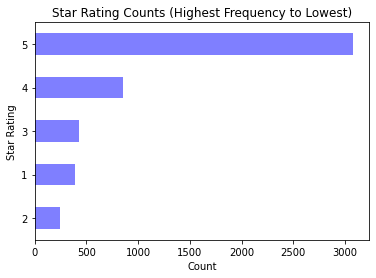

In [0]:
# Calculate value counts
value_counts = python_df['star_rating'].value_counts()

# Sort the value counts by frequency in descending order
sorted_value_counts = value_counts.sort_values(ascending=True)

# Create a horizontal bar plot
sorted_value_counts.plot.barh(color="blue", alpha=0.5)

# Edit visualization
plt.xlabel('Count')
plt.ylabel('Star Rating')
plt.title('Star Rating Counts (Highest Frequency to Lowest)')
plt.show()

## Data Cleaning with PySpark

In [0]:
pyspark_df.printSchema()

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)



In [0]:
# Get the number of rows
num_rows = pyspark_df.count()

# Get the number of columns
num_columns = len(pyspark_df.columns)

# Print the shape
print("Number of Rows: {}".format(num_rows))
print("Number of Columns: {}".format(num_columns))

Number of Rows: 19111522
Number of Columns: 15


In [0]:
# Remove unnecessary columns
selected_columns = ['verified_purchase','product_category','review_headline', 'review_body', 'star_rating', 'review_date']
pyspark_df = pyspark_df.select(*selected_columns)
display(pyspark_df.show(10))

+-----------------+----------------+--------------------+--------------------+-----------+-----------+
|verified_purchase|product_category|     review_headline|         review_body|star_rating|review_date|
+-----------------+----------------+--------------------+--------------------+-----------+-----------+
|                Y|         Apparel|★ THESE REALLY DO...|These Really Do W...|          4| 2013-01-14|
|                Y|         Apparel|Favorite for wint...|I love this dress...|          5| 2014-03-04|
|                Y|         Apparel|Great Socks for t...|Nice socks, great...|          5| 2015-07-12|
|                Y|         Apparel|          Slick hat!|I bought this for...|          5| 2015-06-03|
|                Y|         Apparel|I would do it again!|Perfect dress and...|          5| 2015-06-12|
|                Y|         Apparel|          Five Stars|Excellent for my ...|          5| 2014-04-22|
|                Y|         Apparel|            Love it!|Raw is the only 

In [0]:
# Drop rows with any missing values
pyspark_df = pyspark_df.dropna()

In [0]:
# Repartition the DataFrame before writing to Parquet
pyspark_df_repartitioned = pyspark_df.repartition(4)  # Specify the number of partitions

# Write the repartitioned DataFrame to Parquet
pyspark_df_repartitioned.write.mode("overwrite").parquet('dbfs:/mnt/s3dataread/raw/df_cleaned_repartitioned.parquet')

## Read Cleaned Pyspark Data

In [0]:
# File path to the cleaned data                   
parquet_file_path = 'dbfs:/mnt/s3dataread/raw/df_cleaned_repartitioned.parquet'

# Read the Parquet file into a DataFrame
clean_df = spark.read.parquet(parquet_file_path)

# Show the DataFrame
clean_df.show()

+-----------------+----------------+--------------------+--------------------+-----------+-----------+
|verified_purchase|product_category|     review_headline|         review_body|star_rating|review_date|
+-----------------+----------------+--------------------+--------------------+-----------+-----------+
|                N|         Apparel|Really cute and f...|Really cute and f...|          5| 2015-06-27|
|                Y|         Apparel|         Three Stars| Good for the price.|          3| 2015-08-26|
|                Y|         Apparel|         Unique Look|This looks exactl...|          5| 2015-08-27|
|                Y|         Apparel|          Five Stars|                Love|          5| 2015-08-27|
|                Y|         Apparel|     eh they're good|Lighter than expe...|          3| 2015-03-23|
|                Y|         Apparel|         Three Stars|Grandbaby just tu...|          3| 2015-06-19|
|                Y|         Apparel|          Five Stars|A great dress wi

In [0]:
# Get the number of rows
num_rows = clean_df.count()

# Get the number of columns
num_columns = len(clean_df.columns)

# Print the shape
print("Number of Rows: {}".format(num_rows))
print("Number of Columns: {}".format(num_columns))

Number of Rows: 19108789
Number of Columns: 6


In [0]:
# Randomly select 100k rows from the cleaned dataset
from pyspark.sql.functions import rand
clean_df = clean_df.orderBy(rand()).limit(100000)

## Data Engineering

### Turn multi-classification into binary classification

In [0]:
from pyspark.sql.functions import col, when

# Replace the 'star_rating' column with the transformed values
clean_df = clean_df.withColumn('binary_rating', when(col('star_rating') >= 4, 1).otherwise(0))

# Drop the original 'star_rating' column
clean_df = clean_df.drop('star_rating')

clean_df.show()

+-----------------+--------------------+--------------------+--------------------+-----------+-------------+
|verified_purchase|    product_category|     review_headline|         review_body|review_date|binary_rating|
+-----------------+--------------------+--------------------+--------------------+-----------+-------------+
|                Y|             Apparel|My bad for not re...|I wanted this to ...| 2014-07-16|            1|
|                Y|              Camera|            Good Buy|I bought this cam...| 2010-01-30|            1|
|                Y|             Apparel|The color and fit...|The color and fit...| 2015-01-04|            1|
|                Y|         Electronics|Came so fast I wa...|I brought this it...| 2013-08-12|            1|
|                Y|         Electronics|Bought it for use...|the quality is gr...| 2013-01-05|            1|
|                Y|         Electronics|            One Star|did not help rece...| 2015-07-10|            0|
|                Y|

In [0]:
clean_df_2 = clean_df

### Text cleaning

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, Tokenizer, CountVectorizer, HashingTF, IDF, StringIndexer

# Define a function to perform text cleaning
def clean_text(df, input_col, output_col):
    # Convert text to lowercase
    df = df.withColumn(output_col + '_lower', F.lower(F.col(input_col).cast('string')))

    # Remove punctuation using RegexTokenizer
    regex_tokenizer = RegexTokenizer(inputCol=output_col + '_lower', outputCol=output_col + '_tokens', pattern='\\W')
    df = regex_tokenizer.transform(df)

    # Remove stopwords
    stop_words_remover = StopWordsRemover(inputCol=output_col + '_tokens', outputCol=output_col + '_filtered_tokens')
    df = stop_words_remover.transform(df)

    return df

# Clean the "review_headline" column
clean_df_2 = clean_text(clean_df_2, "review_headline", "cleaned_headline")

# Clean the "review_body" column
clean_df_2 = clean_text(clean_df_2, "review_body", "cleaned_body")

In [0]:
# Keep important columns
selected_columns = ['verified_purchase','product_category','cleaned_headline_tokens','cleaned_body_tokens', 'review_date', 'binary_rating']

clean_df_3 = clean_df_2.select(*selected_columns)

### Check weekend

In [0]:
from pyspark.sql.functions import date_format, dayofweek, col, udf, when
from pyspark.sql.types import StringType
from pyspark.sql import SparkSession
from datetime import datetime

# Set the legacy time parser policy
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

# Define a UDF to determine whether a day is a weekend
def is_weekend(day):

    # Extract the day of the week (0 for Monday, 6 for Sunday)
    day_of_week = day.isoweekday()
    # Return "Y" for weekend days (Saturday or Sunday), "N" otherwise
    return "Y" if day_of_week in [6, 7] else "N"


# Register the UDF with PySpark
is_weekend_udf = udf(is_weekend, StringType())

# Add a new column indicating whether the date is on a weekend
clean_df_3 = clean_df_3.withColumn("is_weekend", is_weekend_udf("review_date"))

### Index categorical data

In [0]:
# Create a StringIndexer model
indexer_1 = StringIndexer(inputCol="product_category", outputCol="product_category_indexed")

# Fit and transform the DataFrame
clean_df_3 = indexer_1.fit(clean_df_3).transform(clean_df_3)

# Do the same for verified_purchase and weekend
indexer_2 = StringIndexer(inputCol="verified_purchase", outputCol="verified_purchase_indexed")
clean_df_3 = indexer_2.fit(clean_df_3).transform(clean_df_3)

indexer_3 = StringIndexer(inputCol="is_weekend", outputCol="is_weekend_indexed")
clean_df_3 = indexer_3.fit(clean_df_3).transform(clean_df_3)

### Text encoding

In [0]:
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession

num_features = 1000

# Define the HashingTF for headline tokens
headline_hashing_tf = HashingTF(inputCol="cleaned_headline_tokens", outputCol="headline_features", numFeatures=num_features)

# Define the HashingTF for body tokens
body_hashing_tf = HashingTF(inputCol="cleaned_body_tokens", outputCol="body_features", numFeatures=num_features)

# Define the IDF for headline features
headline_idf = IDF(inputCol="headline_features", outputCol="headline_features_idf")

# Define the IDF for body features
body_idf = IDF(inputCol="body_features", outputCol="body_features_idf")

# Create a pipeline
pipeline = Pipeline(stages=[headline_hashing_tf, body_hashing_tf, headline_idf, body_idf])

# Fit the pipeline to the data
text_encoder = pipeline.fit(clean_df_3)

# Transform the data to obtain hashed TF-IDF features
encoded_df = text_encoder.transform(clean_df_3)

### Get review sentiment

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType, IntegerType
from textblob import TextBlob

def get_sentiment_score(tokens):
    if not tokens:
        return None
    text = " ".join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_array_length(tokens):
    return len(tokens)

sentiment_udf = udf(get_sentiment_score, FloatType())
length_udf = udf(get_array_length, IntegerType())

# Apply the UDFs to the DataFrame
encoded_df = encoded_df.withColumn("headline_sentiment", sentiment_udf("cleaned_headline_tokens"))
encoded_df = encoded_df.withColumn("body_sentiment", sentiment_udf("cleaned_body_tokens"))

encoded_df = encoded_df.withColumn("headline_length", length_udf("cleaned_headline_tokens"))
encoded_df = encoded_df.withColumn("body_length", length_udf("cleaned_body_tokens"))

In [0]:
encoded_df = encoded_df.dropna()

## Modeling

### Get initial model & train/test split

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("text-classification").getOrCreate()

# Assemble features
feature_assembler = VectorAssembler(
    inputCols=["headline_features_idf", "body_features_idf", "product_category_indexed", "headline_sentiment", "headline_length", "body_sentiment", "body_length", "verified_purchase_indexed", "is_weekend_indexed"],
    outputCol="features"
)

# Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="binary_rating", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Create a pipeline
pipeline = Pipeline(stages=[feature_assembler, lr])

# Split the data into training and testing sets
(training_data, testing_data) = encoded_df.randomSplit([0.8, 0.2], seed=42)

### Check label distribution & Resample

In [0]:
# Count the number of instances in each class
class_counts = training_data.groupBy('binary_rating').count()

# Find the class with fewer instances (binary classification)
minority_class = class_counts.orderBy('count').first()['binary_rating']

# Calculate the oversampling ratio
oversample_ratio = class_counts.where(col('binary_rating') == 1).collect()[0]['count'] / class_counts.where(col('binary_rating') == 0).collect()[0]['count']

# Oversample the instances where binary_rating is 0
oversampled_training = training_data.union(training_data.filter(col('binary_rating') == 0).sample(True, oversample_ratio, seed=42))

### Grid Search & Cross Validation

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the parameter grid for grid search
param_grid = ParamGridBuilder() \
    .addGrid(lr.maxIter, [5, 10]) \
    .addGrid(lr.regParam, [0.1, 0.3]) \
    .build()

# Create a cross-validator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=param_grid,
                          evaluator=BinaryClassificationEvaluator(labelCol="binary_rating", metricName="areaUnderROC"),
                          numFolds=2)

# Run cross-validation and choose the best set of parameters
cv_model = crossval.fit(training_data)

### Model evaluation

In [0]:
# Make predictions on the testing data using the best model
cv_predictions = cv_model.transform(testing_data)

# Evaluate the model
cv_evaluator = BinaryClassificationEvaluator(labelCol="binary_rating", metricName="areaUnderROC")
cv_accuracy = cv_evaluator.evaluate(cv_predictions)

# Print the best parameters and accuracy
best_params = cv_model.bestModel.stages[-1].extractParamMap()
print(f"Best Parameters: {best_params}")
print(f"Cross-validated Accuracy: {cv_accuracy}")

Best Parameters: {Param(parent='LogisticRegression_652ff12173b7', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_652ff12173b7', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.8, Param(parent='LogisticRegression_652ff12173b7', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_652ff12173b7', name='featuresCol', doc='features column name.'): 'features', Param(parent='LogisticRegression_652ff12173b7', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_652ff12173b7', name='labelCol', doc='label column name.'): 'binary_rating', Param(parent='LogisticRegression_652ff12173b7', name='maxBlockSizeInMB', doc='maximum

In [0]:
# Convert Spark DataFrame to Pandas DataFrame
cv_predictions_pd = cv_predictions.select("binary_rating", "prediction").toPandas()

# Extract actual and predicted labels
y_true = cv_predictions_pd["binary_rating"]
y_pred = cv_predictions_pd["prediction"]

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

def binary_classification_metrics(y_true, y_pred):
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Create and return a dictionary with the metrics
    metrics_dict = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    return metrics_dict

metrics = binary_classification_metrics(y_true, y_pred)
print(metrics)

{'Precision': 0.7905483369287112, 'Recall': 0.9992390615091947, 'F1 Score': 0.8827269417135816}


## Meaningful Visualization

### Confusion Matrix

<Figure size 576x432 with 0 Axes>

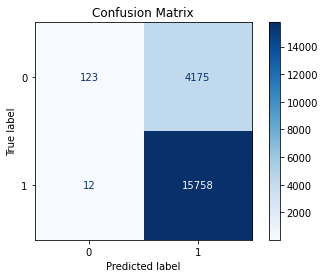

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File <command-4133738480236204>:23
     20 dbfs_path = '/dbfs/mnt/s3dataread/Visualization/confusion_matrix.png'
     22 # Save the image to DBFS
---> 23 with open(dbfs_path, 'wb') as file:
     24     file.write(image_stream.read())
     26 # Display the DBFS path

FileNotFoundError: [Errno 2] No such file or directory: '/dbfs/mnt/s3dataread/Visualization/confusion_matrix.png'

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from io import BytesIO

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")

# Save the plot to a BytesIO object
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# Specify the DBFS path
dbfs_path = '/dbfs/mnt/s3dataread/Visualization/confusion_matrix.png'

# Save the image to DBFS
with open(dbfs_path, 'wb') as file:
    file.write(image_stream.read())

# Display the DBFS path
print(f"Confusion matrix plot saved to DBFS: {dbfs_path}")

### ROC Curve

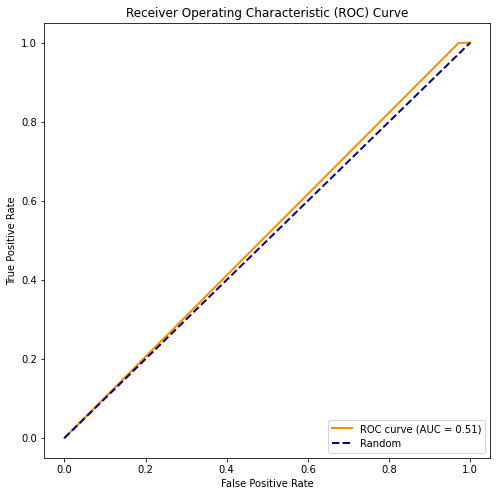

<Figure size 432x288 with 0 Axes>

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File <command-4133738480236206>:20
     17 dbfs_path_roc = '/dbfs/mnt/s3dataread/Visualization/roc_curve.png'
     19 # Save the ROC curve plot directly to DBFS
---> 20 plt.savefig(dbfs_path_roc, format='png')
     22 # Display the DBFS path
     23 print(f"ROC curve plot saved to DBFS: {dbfs_path_roc}")

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:958, in savefig(*args, **kwargs)
    955 @_copy_docstring_and_deprecators(Figure.savefig)
    956 def savefig(*args, **kwargs):
    957     fig = gcf()
--> 958     res = fig.savefig(*args, **kwargs)
    959     fig.canvas.draw_idle()   # need this if 'transparent=True' to reset colors
    960     return res

File /databricks/python/lib/python3.9/site-packages/matplotlib/figure.py:3019, in Figure.savefig(self, fname, transparent, **kwargs)
   3015     for ax in sel

In [0]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Specify the DBFS path
dbfs_path_roc = '/dbfs/mnt/s3dataread/Visualization/roc_curve.png'

# Save the ROC curve plot directly to DBFS
plt.savefig(dbfs_path_roc, format='png')

# Display the DBFS path
print(f"ROC curve plot saved to DBFS: {dbfs_path_roc}")

In [0]:
new_df = encoded_df.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field headline_features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


### WordCloud

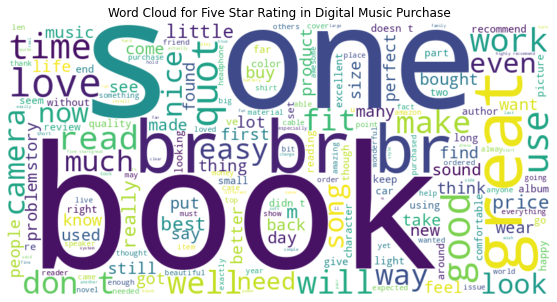

<Figure size 432x288 with 0 Axes>

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File <command-4133738480236209>:31
     28 dbfs_path_wordcloud = '/dbfs/mnt/s3dataread/Visualization/wordcloud.png'
     30 # Save the image to DBFS
---> 31 plt.savefig(dbfs_path_wordcloud, format='png')
     33 # Display the DBFS path
     34 print(f"Word Cloud plot saved to DBFS: {dbfs_path_wordcloud}")

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:958, in savefig(*args, **kwargs)
    955 @_copy_docstring_and_deprecators(Figure.savefig)
    956 def savefig(*args, **kwargs):
    957     fig = gcf()
--> 958     res = fig.savefig(*args, **kwargs)
    959     fig.canvas.draw_idle()   # need this if 'transparent=True' to reset colors
    960     return res

File /databricks/python/lib/python3.9/site-packages/matplotlib/figure.py:3019, in Figure.savefig(self, fname, transparent, **kwargs)
   3015     for ax in se

In [0]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = new_df[new_df['binary_rating'] == 1][['cleaned_headline_tokens','cleaned_body_tokens']]

# Convert lists to strings and combine the text
positive_text['cleaned_headline_tokens'] = positive_text['cleaned_headline_tokens'].apply(lambda x: ' '.join(x))
positive_text['cleaned_body_tokens'] = positive_text['cleaned_body_tokens'].apply(lambda x: ' '.join(x))

# Combine the text from the two columns
combined_text = ' '.join(positive_text['cleaned_headline_tokens'] + positive_text['cleaned_body_tokens'])

# Remove brackets and commas
combined_text = combined_text.replace('[', '').replace(']', '').replace(',', '')

# Generate WordCloud without specifying a custom font
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Five Star Rating in Digital Music Purchase')
plt.show()

# Specify the DBFS path
dbfs_path_wordcloud = '/dbfs/mnt/s3dataread/Visualization/wordcloud.png'

# Save the image to DBFS
plt.savefig(dbfs_path_wordcloud, format='png')

# Display the DBFS path
print(f"Word Cloud plot saved to DBFS: {dbfs_path_wordcloud}")

### Sentiment Distribution

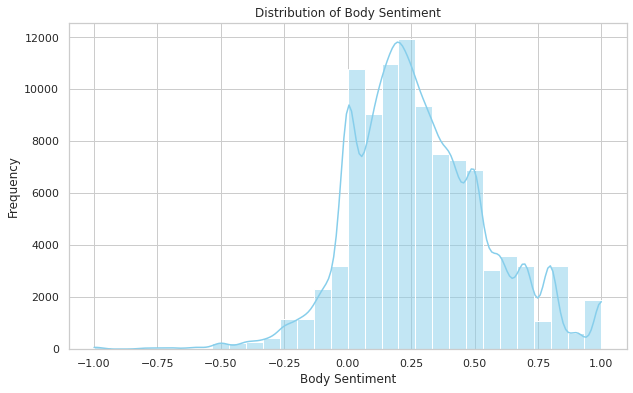

<Figure size 432x288 with 0 Axes>

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File <command-4133738480236211>:20
     17 dbfs_path_histogram = '/dbfs/mnt/s3dataread/Visualization/body_sentiment_histogram.png'
     19 # Save the histogram plot directly to DBFS
---> 20 plt.savefig(dbfs_path_histogram, format='png')
     22 # Display the DBFS path
     23 print(f"Histogram plot saved to DBFS: {dbfs_path_histogram}")

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:958, in savefig(*args, **kwargs)
    955 @_copy_docstring_and_deprecators(Figure.savefig)
    956 def savefig(*args, **kwargs):
    957     fig = gcf()
--> 958     res = fig.savefig(*args, **kwargs)
    959     fig.canvas.draw_idle()   # need this if 'transparent=True' to reset colors
    960     return res

File /databricks/python/lib/python3.9/site-packages/matplotlib/figure.py:3019, in Figure.savefig(self, fname, transparent, **

In [0]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(new_df['body_sentiment'], bins=30, kde=True, color='skyblue')

# Customize the plot
plt.title('Distribution of Body Sentiment')
plt.xlabel('Body Sentiment')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Specify the DBFS path
dbfs_path_histogram = '/dbfs/mnt/s3dataread/Visualization/body_sentiment_histogram.png'

# Save the histogram plot directly to DBFS
plt.savefig(dbfs_path_histogram, format='png')

# Display the DBFS path
print(f"Histogram plot saved to DBFS: {dbfs_path_histogram}")